<a href="https://colab.research.google.com/github/RickPardono/An-lise-de-dados-sobre-a-degrada-o-da-Floresta-Amaz-nica-Brasileira/blob/main/Script_Cap3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importando as bibliotecas e o comando %matplotlib:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
# Carregando os arquivos no notebook e fazendo a leitura:
def_amazon_data = pd.read_csv('/content/def_area_2004_2019.csv')
amazon_fires = pd.read_csv('/content/inpe_brazilian_amazon_fires_1999_2019.csv')

In [3]:
# Renomeando a primeira e a última coluna para melhor entendimento do primeiro Dataframe 'def_amazon_data':
def_amazon_data = def_amazon_data.rename(columns={'Ano/Estados': 'Ano', 'AMZ LEGAL': 'Total'})

In [4]:
# Cabeçalho do primeiro Dataframe após a mudança dos nomes das 2 colunas:
def_amazon_data.head()

,Ano,AC,AM,AP,MA,MT,PA,RO,RR,TO,Total
0,2004,728,1232,46,755,11814,8870,3858,311,158,27772
1,2005,592,775,33,922,7145,5899,3244,133,271,19014
2,2006,398,788,30,674,4333,5659,2049,231,124,14286
3,2007,184,610,39,631,2678,5526,1611,309,63,11651
4,2008,254,604,100,1271,3258,5607,1136,574,107,12911


In [5]:
# Cabeçalho do segundo Dataframe:
amazon_fires.head()

,year,month,state,latitude,longitude,firespots
0,1999,1,AMAZONAS,-2.371113,-59.899933,3
1,1999,1,MARANHAO,-2.257395,-45.487831,36
2,1999,1,MATO GROSSO,-12.660633,-55.057989,18
3,1999,1,PARA,-2.474820,-48.546967,87
4,1999,1,RONDONIA,-12.861700,-60.513100,1


In [ ]:
# Criando um novo Dataframe a partir do primeiro Dataframe, com 2 colunas 'Estados' e 'Total' para usar no próximo gráfico:
somas = []
for col in def_amazon_data.columns:
  soma_coluna = def_amazon_data[col].sum()
  somas.append(soma_coluna)
del somas[0]
del somas[9]
states = ["AC","AM","AP","MA","MT","PA","RO","RR","TO"]
df_somas = pd.DataFrame({'States':states, 'Total':somas})

In [14]:
# Novo Dataframe criado:
df_somas

,States,Total
0,AC,5722
1,AM,12425
2,AP,616
3,MA,8318
4,MT,43065
5,PA,62778
6,RO,22279
7,RR,3891
8,TO,1241


In [16]:
# Filtrando as linhas da coluna ano do segundo Dataframe para selecionar somente
# as linhas com ano 2004 em diante, e criar novo Dataframe para usar no próximo gráfico:
amazon_fires_filtered = amazon_fires[amazon_fires['year'] >= 2004]
state_fires_df = pd.pivot_table(amazon_fires_filtered, values='firespots',index=['state'], 
                                aggfunc=np.sum, fill_value=0)

In [ ]:
# Novo Dataframe criado:
state_fires_df

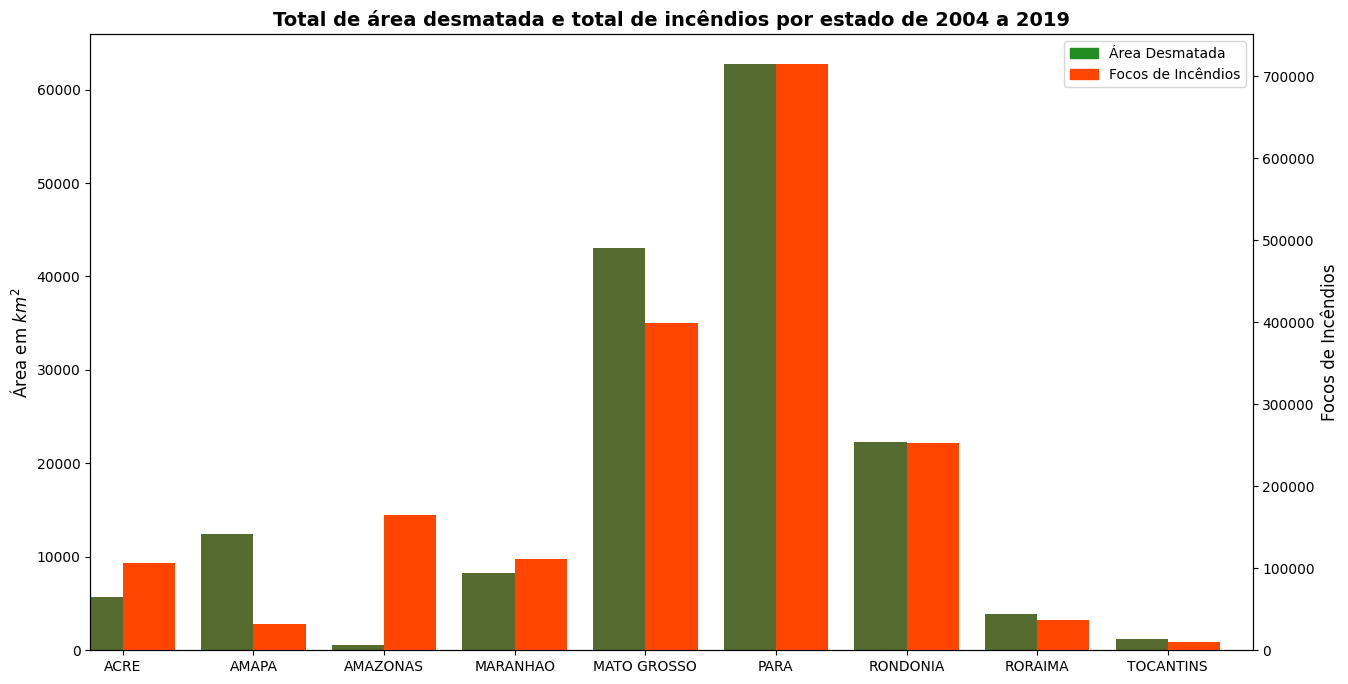

In [20]:
# Plotando a área total desmatada por estado junto com o total de incêndios por estado pra verificar se há correlação:
fig, ax = plt.subplots(figsize=(15,8))
df_somas.Total.plot(kind='bar', color='darkolivegreen', ax=ax, width=0.4, rot=0, position=1)
ax.set_title('Total de área desmatada e total de incêndios por estado de 2004 a 2019', fontsize=14, weight='bold')
ax.set_ylabel('Área em $km^2$', fontsize=12)
ax.set_xlabel('')
ax2 = ax.twinx()
state_fires_df.firespots.plot(kind='bar', color='orangered', ax=ax2, width=0.4, rot=0, position=0)
ax2.set_ylabel('Focos de Incêndios', fontsize=12)
bar_colors = {'Área Desmatada': 'forestgreen', 'Focos de Incêndios': 'orangered'}
bar_labels = ['Área Desmatada', 'Focos de Incêndios']
bar_handles = [plt.Rectangle((0,0),1,1,color=bar_colors[label]) for label in bar_labels]
ax.legend(bar_handles, bar_labels)
fig = plt.gcf()
plt.savefig('grafico7.png', format='png')
plt.show()
